# Demo: Verification of TIF to xr.Dataset Conversion

_Note:_

1) To verify TIFF conversion to xr.dataset, drop this notebook into "/src/icefabric_tools/src/icefabric_tools/icechunk"

2) Just for the purpose of using this notebook, one can replace "from icefabric_tools.icechunk import S3Path" to "from 
icechunk_s3_module import S3Path" from within the "/src/icefabric_tools/src/icefabric_tools/icechunk/arch_weather_file_utils.py"

3) One can now verify that TIFFs can be converted to xr.Dataset as seen as below.


# Import Modules

In [1]:
from arch_weather_file_utils import *
from icechunk_s3_module import IcechunkS3Repo, NGWPCLocations

# Retrieves a TIFF from S3 & Saves to Local

In [2]:
repo = IcechunkS3Repo(location=NGWPCLocations.TOPO_HA_30M_IC.path)
ds = repo.retrieve_dataset()

var_name = "__xarray_dataarray_variable__"
dest = "./hawaii_topo_30.tif"
repo.retrieve_and_convert_to_tif(dest=dest, var_name=var_name)

Saved dataset to ./hawaii_topo_30.tif


### Code Findings:

- An error will occur under because "read_only=True" is not an argument in icechunk_s3_module.py"s 'retrieve_dataset()' method. Refer to of L381. Putting in a PR for this change as a result.

# After Code Modification, the following code is able to convert TIFF to xr.Dataset

- This conversion effectively allows _xarray_data_variable_ to be converted to `elevation`. 


In [3]:
dest = "./hawaii_topo_30.tif"
ds = load_tiff_file(fp = dest)
ds

<xarray.Dataset> Size: 1GB
Dimensions:      (band: 1, x: 22226, y: 14819)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 178kB -160.5 -160.5 -160.5 ... -154.5 -154.5 -154.5
  * y            (y) float64 119kB 22.5 22.5 22.5 22.5 ... 18.5 18.5 18.5 18.5
    spatial_ref  int64 8B 0
Data variables:
    elevation    (band, y, x) float32 1GB ...

# Prior to Code Modification, the following was being generated for TIFF

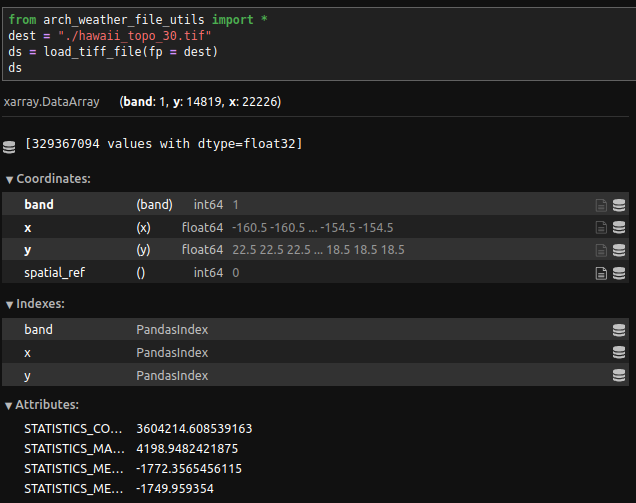